In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y= iris.target
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
# Next, we fit k-means with k values equal to 2,3,4,5,6:
# Defining the k-means
cluster_numbers = [2,3,4,5,6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters = i, random_state = 123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

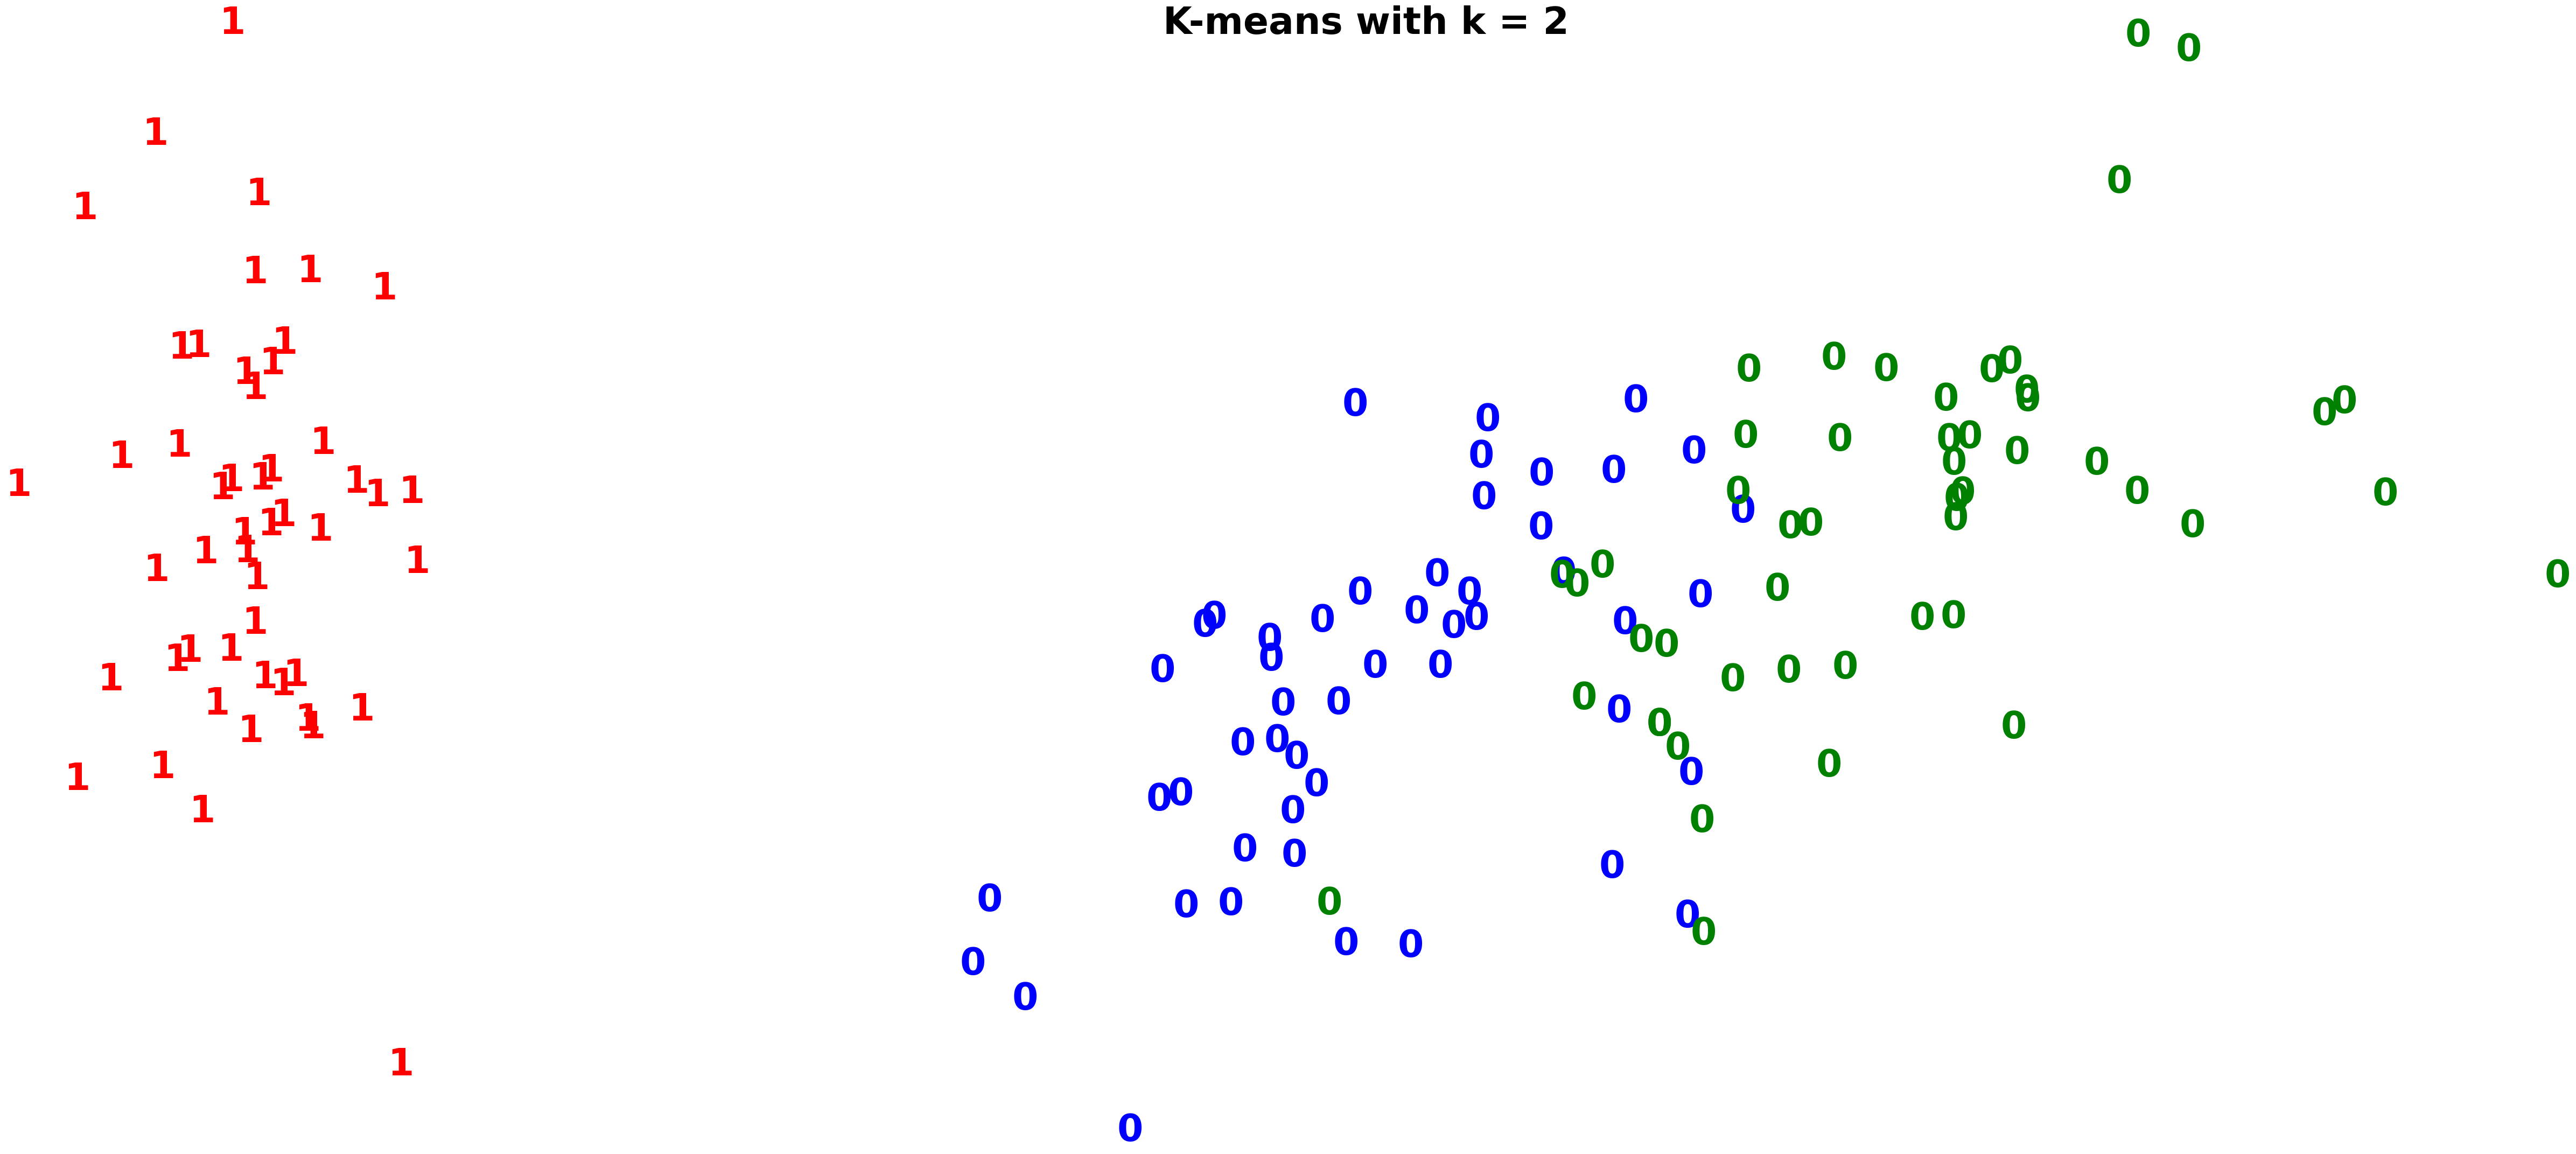

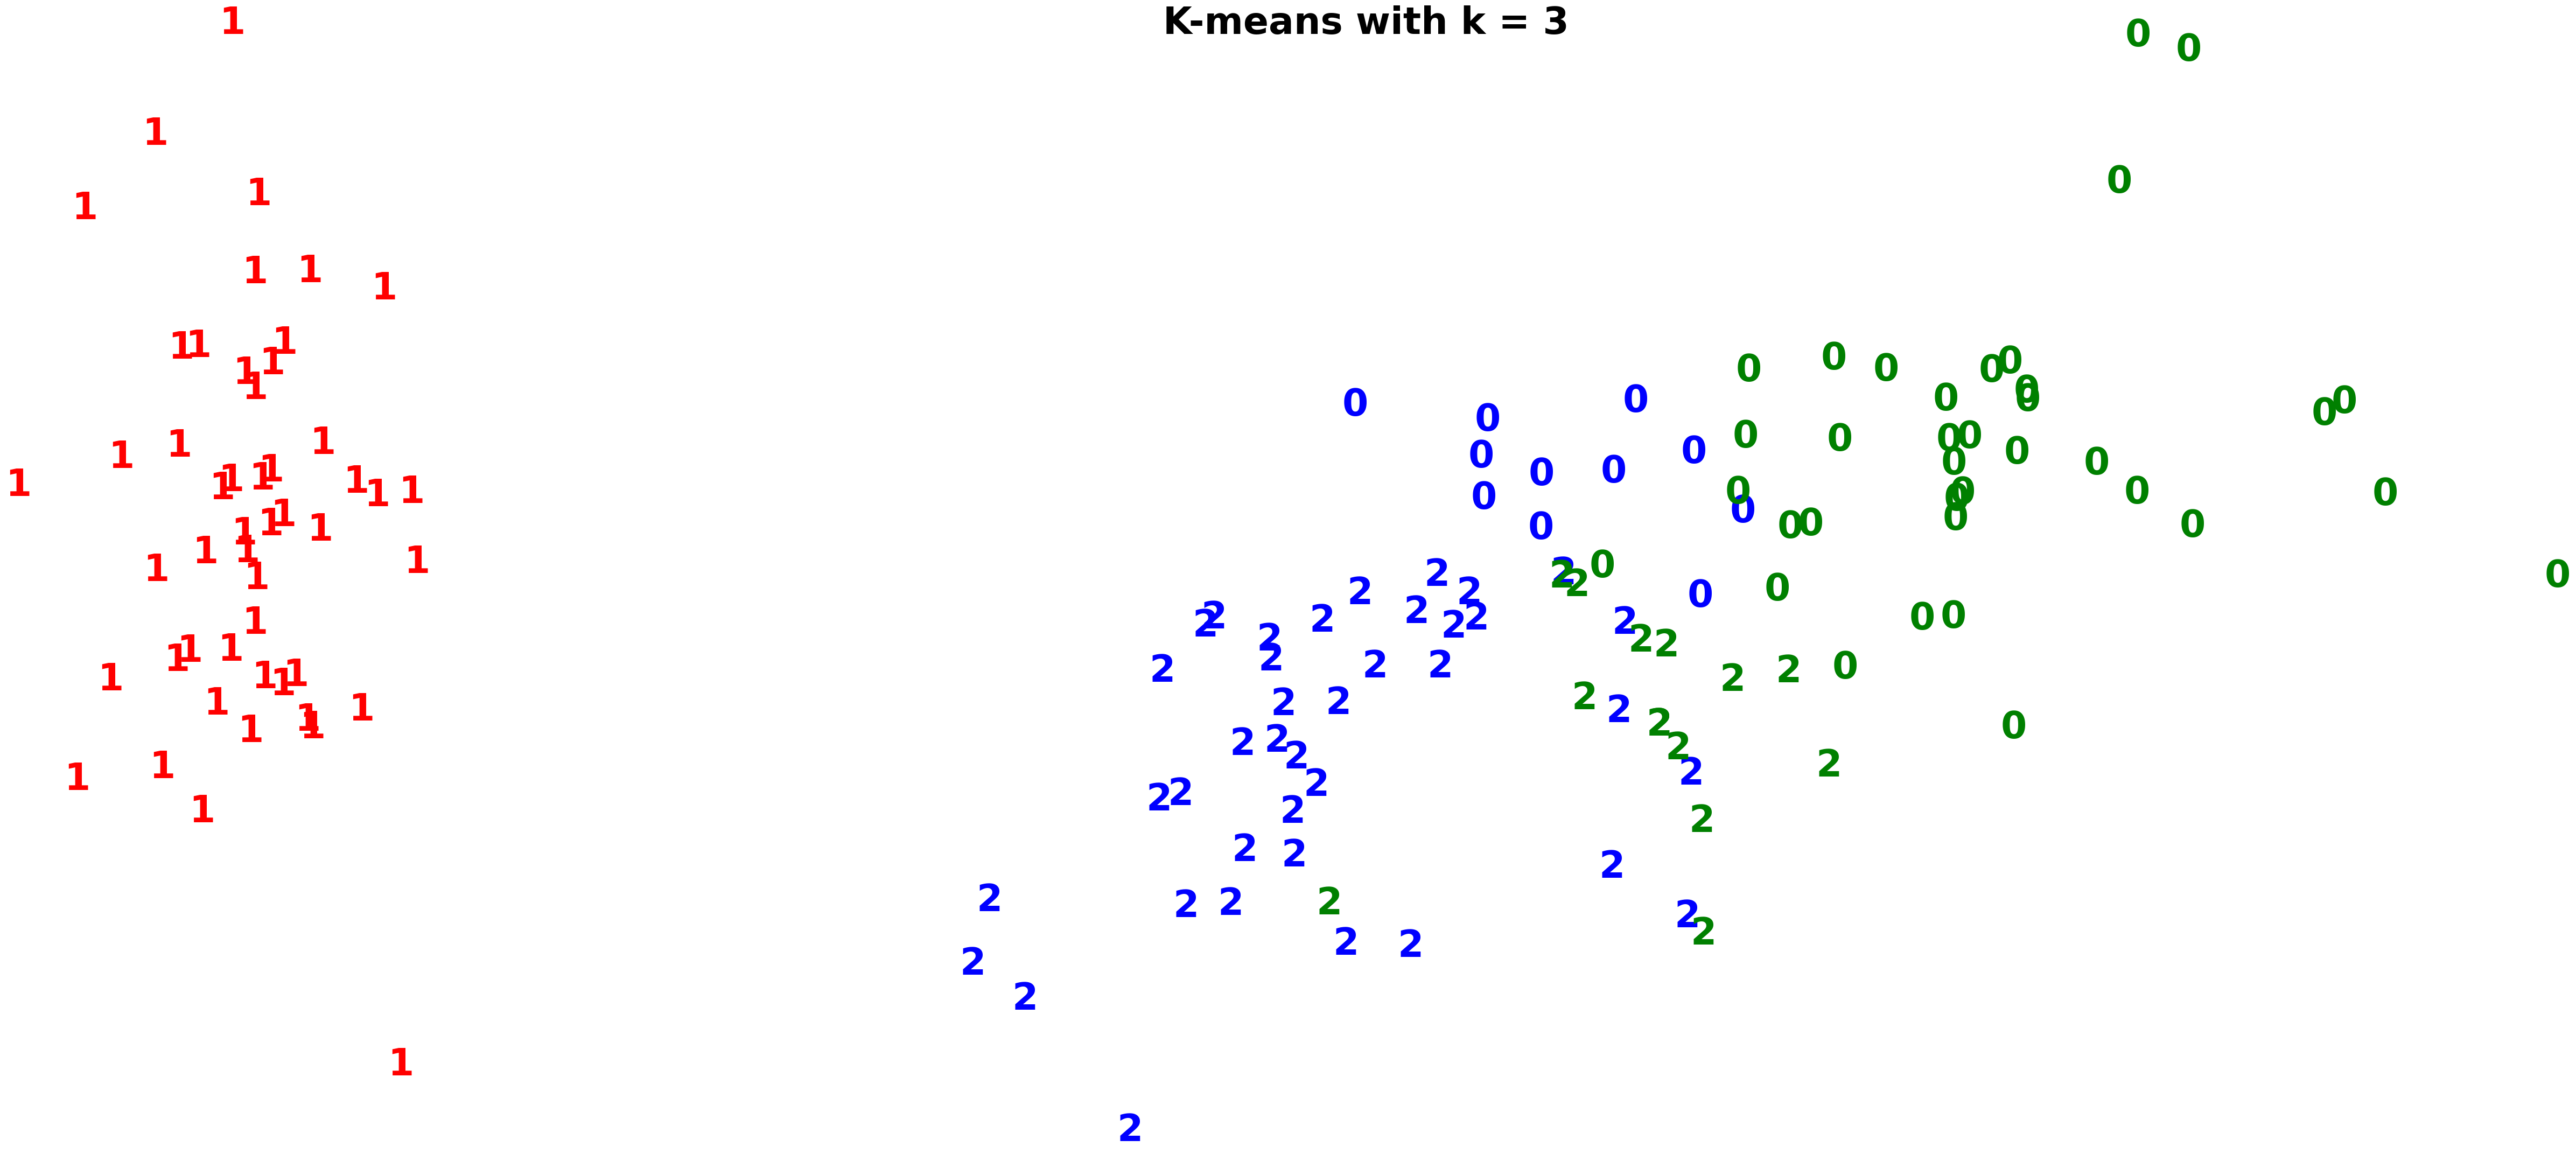

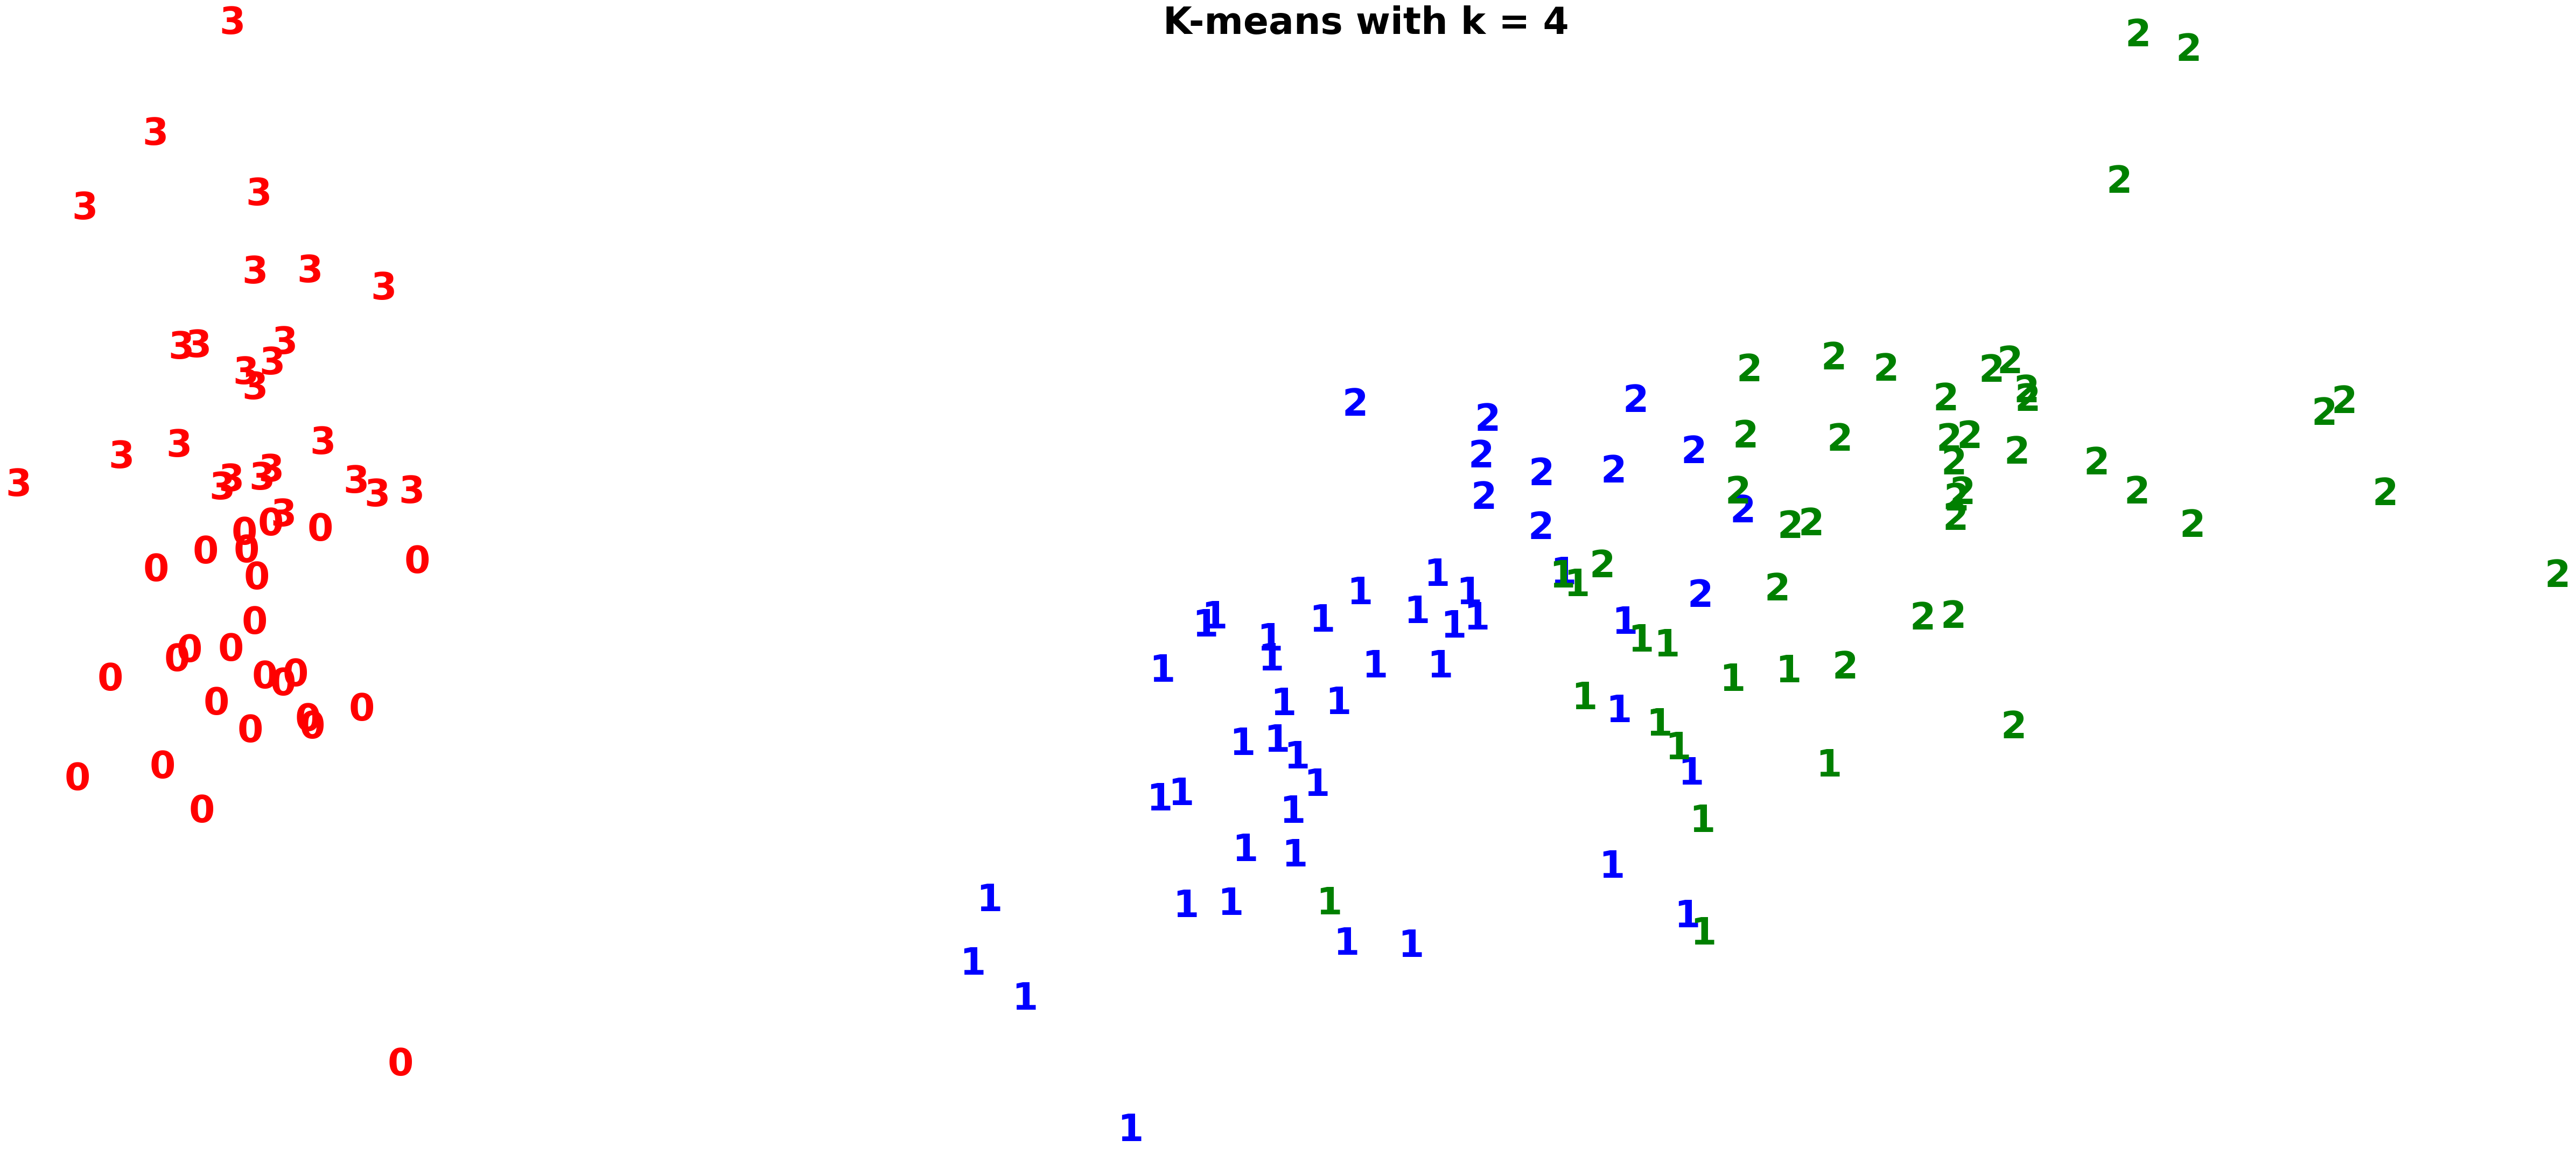

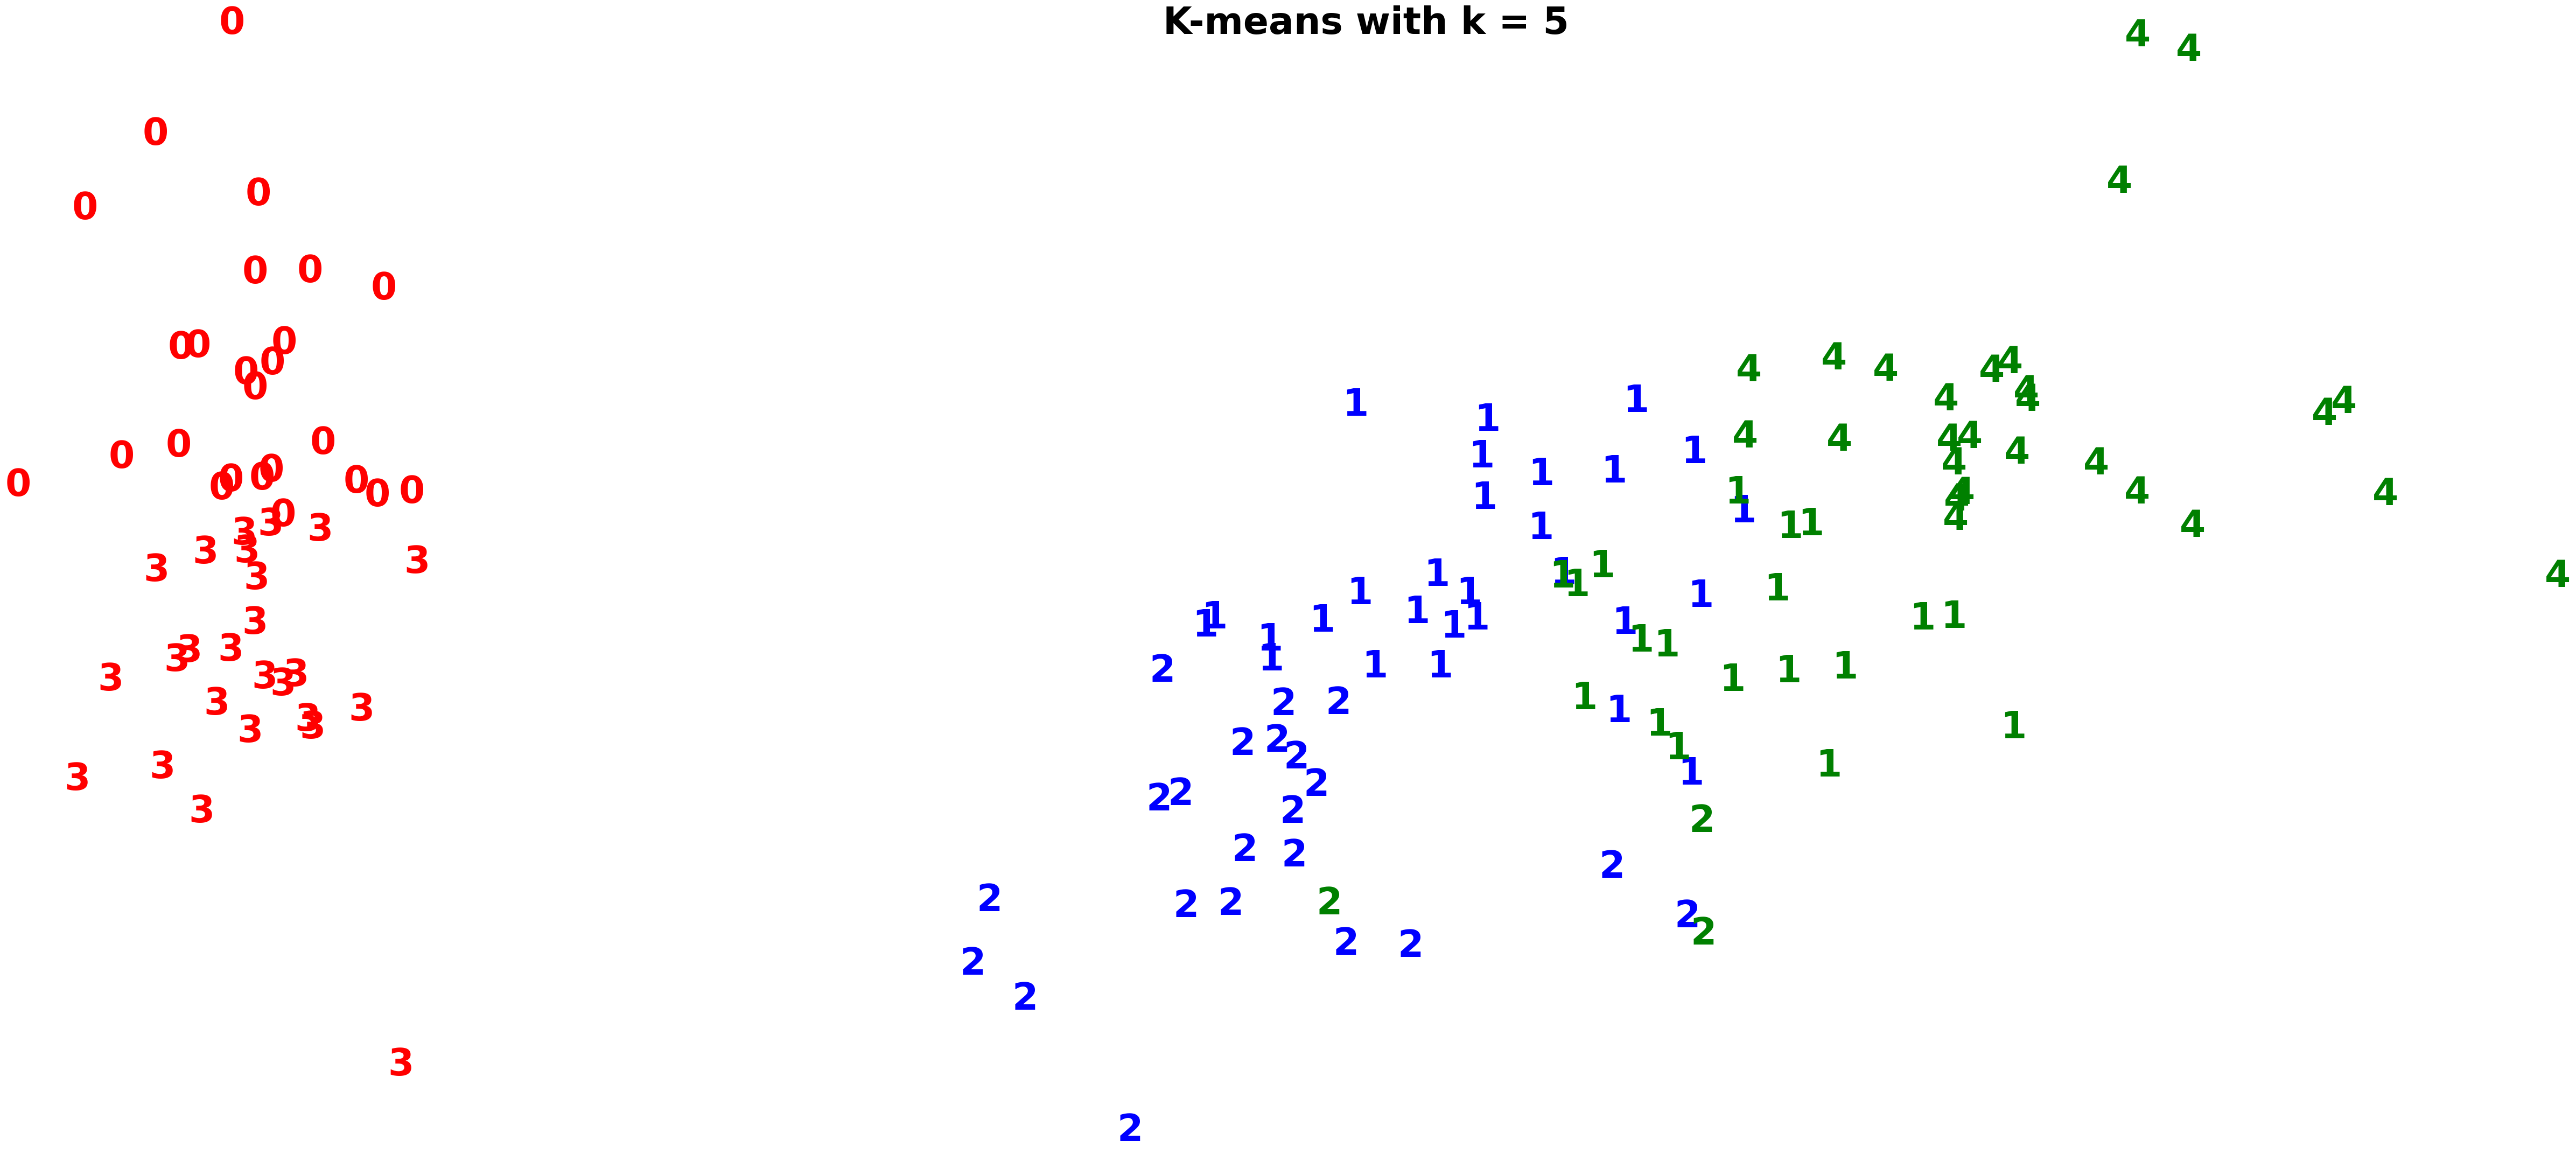

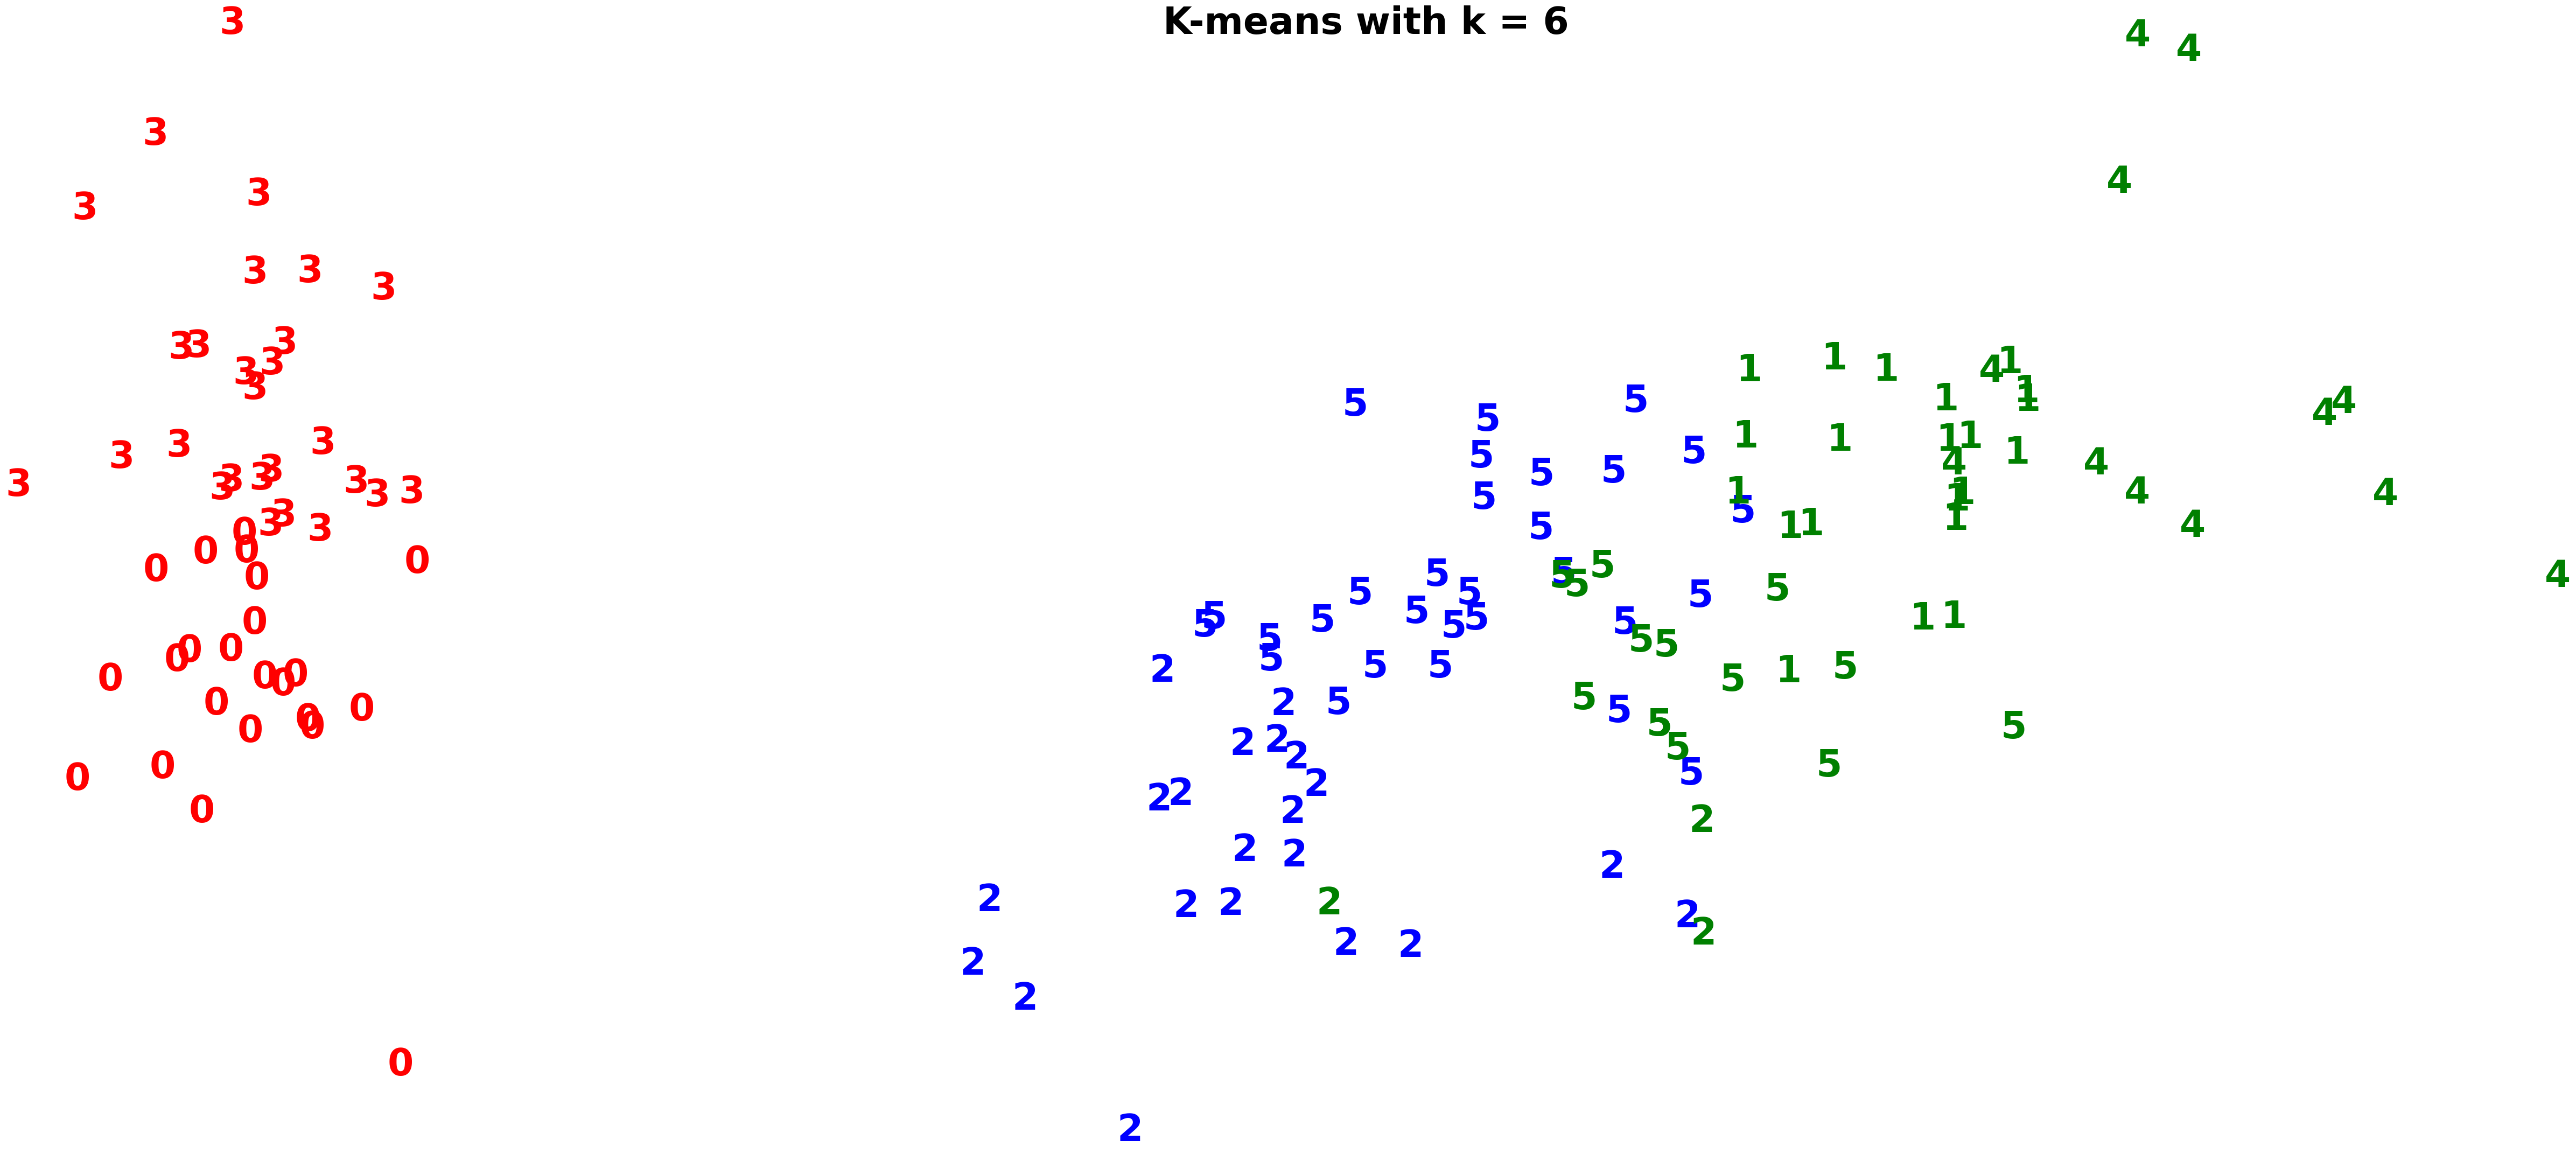

In [4]:
# Next, we visualize each k-means solution:
pca = PCA(n_components =2).fit_transform(X_std)
colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize = (10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:,1]), 'K-means with k = {}'.format(cluster_numbers[i]),
            fontdict = {'weight':'bold','size':50})
    for i in range(pca.shape[0]):
        plt.text(pca[i,0],pca[i,1], str(solution[i]),
                color = colours[y[i]],
                fontdict = {'weight': 'bold','size':50})
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [5]:
# first we load the dataset and then normalize our variables. Also, to make it easier to visualize the clusters, we reduce the data to 2 components using PCA.

In [10]:
from sqlalchemy import create_engine
import pandas as pd

# Define connection parameters
postgres_user = 'postgres'
postgres_pw = 'Merizim43.'
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


AttributeError: 'OptionEngine' object has no attribute 'execute'

In [12]:
# Define the features and the outcome:
X = df.iloc[:, :13]
y= df.iloc[:, 13]
# Replace missing values (marked by ?) with a o
X = X.replace(to_replace = '?', value =0)
# Binarize y so that 1 means herat desease diagnosis and 0 means no diagnosis
y = np.where (y>0,1,0)

NameError: name 'df' is not defined

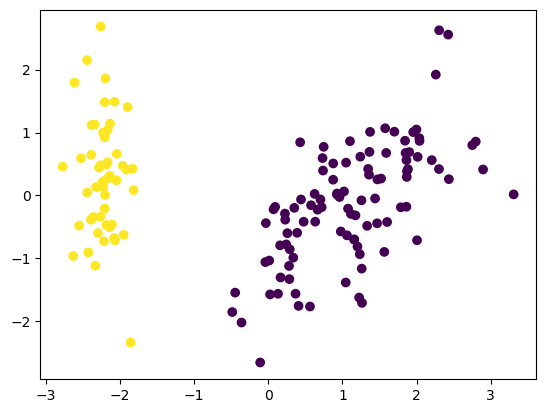

Comparing k-means clusters against the data:
col_0   0   1   2
row_0            
0       0  50  50
1      50   0   0


In [14]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters = 2, random_state= 123).fit_predict(X_std)

# Plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_pred)
plt.show()

# Check the solution against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred,y))

In [15]:
# This is the code, the data couldn't be downloaded from thinkful database.